In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

# Load Data

In [ ]:
df_comments = pd.read_csv('/content/drive/MyDrive/DSI Jateng/DKK Semarang/data/data_complete_visualization.csv')
df_comments.head()

,text,label,username,likes,datetime,data_type
0,ijin share,positive,username,0,2020-03-03,development
1,perlune cuci tangan mbing santai wae,neutral,username,1,2020-03-03,development
2,pegawai puskesmas,neutral,username,0,2020-03-06,development
3,pegawai rs pendaftaran wajib memakai masker,neutral,username,0,2020-03-06,development
4,tangan terima kasih inpo cuci tangana tangan_t...,positive,username,0,2020-03-11,development


In [ ]:
df_coronas = pd.read_excel('/content/drive/MyDrive/DSI Jateng/DKK Semarang/data/corona_semarang_15112021.xlsx')
df_coronas.head()

,Tanggal,PROBABLE,SUSPECT,POSITIVE ACTIVE,CUMULATIVE RECOVERED,CUMULATIVE DEATH,NEW RECOVERED,NEW DEATH,NEW POSITIVE
0,2020-04-09,0,114,36,10,12,10,12,36
1,2020-04-10,0,117,42,22,12,12,0,18
2,2020-04-11,0,121,45,25,13,3,1,7
3,2020-04-12,0,124,50,27,14,2,1,8
4,2020-04-13,0,131,56,31,14,4,0,10


# EDA

In [ ]:
comments = df_comments.copy()
coronas = df_coronas.copy()

In [ ]:
# check info
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24351 entries, 0 to 24350
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       24351 non-null  object
 1   label      24351 non-null  object
 2   username   24351 non-null  object
 3   likes      24351 non-null  object
 4   datetime   24351 non-null  object
 5   data_type  24351 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [ ]:
coronas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tanggal               584 non-null    datetime64[ns]
 1   PROBABLE              584 non-null    int64         
 2   SUSPECT               584 non-null    int64         
 3   POSITIVE ACTIVE       584 non-null    int64         
 4   CUMULATIVE RECOVERED  584 non-null    int64         
 5   CUMULATIVE DEATH      584 non-null    int64         
 6   NEW RECOVERED         584 non-null    int64         
 7   NEW DEATH             584 non-null    int64         
 8   NEW POSITIVE          584 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 41.2 KB


In [ ]:
# fixing data type datetime
comments['datetime'] = pd.to_datetime(comments['datetime'])
comments.dtypes

text                 object
label                object
username             object
likes                object
datetime     datetime64[ns]
data_type            object
dtype: object

In [ ]:
# sorting comments ascending by datetime
comments = comments.sort_values('datetime').reset_index(drop=True)
comments.head()

,text,label,username,likes,datetime,data_type
0,ijin share,positive,username,0,2020-03-03,development
1,perlune cuci tangan mbing santai wae,neutral,username,1,2020-03-03,development
2,pegawai puskesmas,neutral,username,0,2020-03-06,development
3,pegawai rs pendaftaran wajib memakai masker,neutral,username,0,2020-03-06,development
4,tangan terima kasih inpo cuci tangana tangan_t...,positive,username,0,2020-03-11,development


In [ ]:
comments['datetime'].min()

Timestamp('2020-03-03 00:00:00')

In [ ]:
comments['datetime'].max()

Timestamp('2021-11-14 00:00:00')

In [ ]:
# slice data corona by maximum and minimum date of comment
coronas_slice = coronas[coronas['Tanggal'] <= '2021-11-14']
coronas_slice.head()

,Tanggal,PROBABLE,SUSPECT,POSITIVE ACTIVE,CUMULATIVE RECOVERED,CUMULATIVE DEATH,NEW RECOVERED,NEW DEATH,NEW POSITIVE
0,2020-04-09,0,114,36,10,12,10,12,36
1,2020-04-10,0,117,42,22,12,12,0,18
2,2020-04-11,0,121,45,25,13,3,1,7
3,2020-04-12,0,124,50,27,14,2,1,8
4,2020-04-13,0,131,56,31,14,4,0,10


In [ ]:
# export to csv
coronas.to_csv('data_corona_semarang_14112021.csv', index=False)

# Study Case Daily

## Kasus Aktif vs Cumulative Sembuh vs Cumulative Meninggal

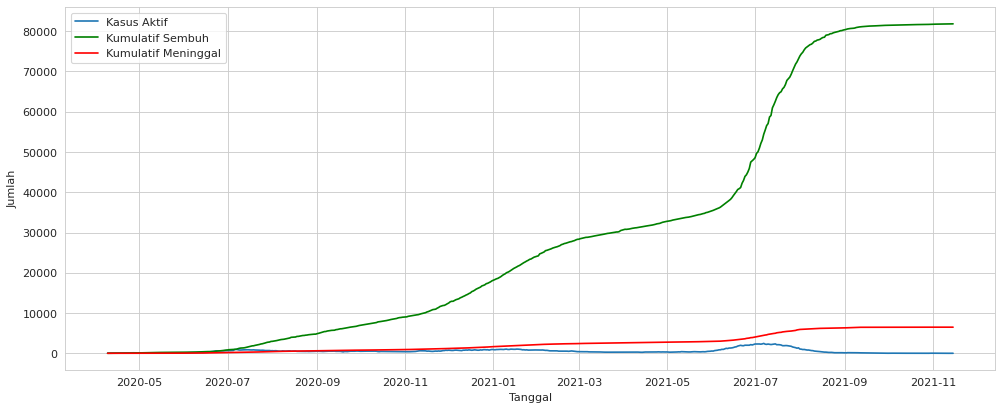

In [ ]:
# kasus aktif vs cumulative sembuh vs cumulative meninggal
plt.figure(figsize=(15,6), dpi=80)
sns.lineplot(data=coronas, x='Tanggal', y='POSITIVE ACTIVE')
sns.lineplot(data=coronas, x='Tanggal', y='CUMULATIVE RECOVERED', color='green')
sns.lineplot(data=coronas, x='Tanggal', y='CUMULATIVE DEATH', color='red')

plt.legend(['Kasus Aktif', 'Kumulatif Sembuh', 'Kumulatif Meninggal'])
plt.ylabel('Jumlah');

## Kasus Aktif vs Sembuh vs Meninggal

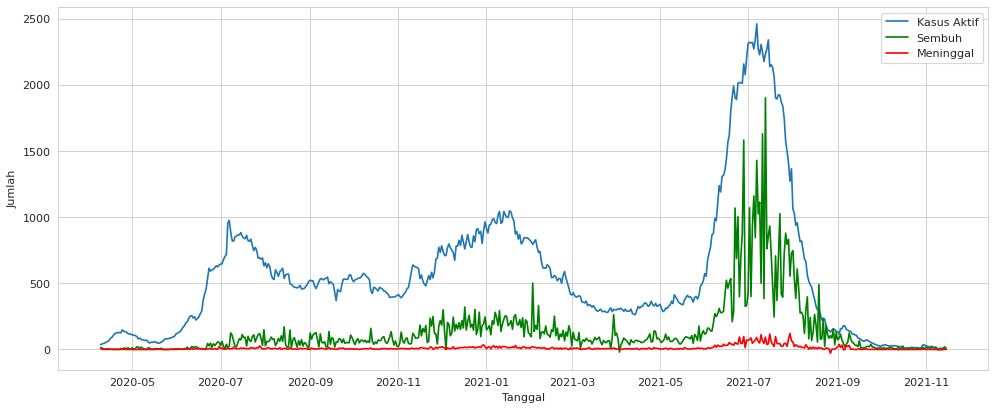

In [ ]:
# kasus aktif vs sembuh vs meninggal
plt.figure(figsize=(15,6), dpi=80)
sns.lineplot(data=coronas, x='Tanggal', y='POSITIVE ACTIVE')
sns.lineplot(data=coronas, x='Tanggal', y='NEW RECOVERED', color='green')
sns.lineplot(data=coronas, x='Tanggal', y='NEW DEATH', color='red')

plt.legend(['Kasus Aktif', 'Sembuh', 'Meninggal'])
plt.ylabel('Jumlah');

## ✅ COVID-19 Cases, Recovery, and Deaths

In [ ]:
temp = coronas.copy()
fig = go.Figure(data=[
                      go.Bar(name='Deaths', x=temp['Tanggal'], y=temp['NEW DEATH'], marker_color='#ff0000'),
                      go.Bar(name='Recovered Cases', x=temp['Tanggal'], y=temp['NEW RECOVERED'], marker_color='#2bad57'),
                      go.Bar(name='Confirmed Cases', x=temp['Tanggal'], y=temp['POSITIVE ACTIVE'], marker_color='#326ac7')])
fig.update_layout(barmode='stack')
fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text='COVID-19 Cases, Recovery and Deaths Daily in Semarang',
                  plot_bgcolor='rgb(275, 270, 273)',
                  template='presentation')
fig.show()

## New COVID-19 Cases Daily

In [ ]:
fig = px.bar(coronas, x="Tanggal", y="NEW POSITIVE", barmode='group', height=500)
fig.update_layout(title_text='New COVID-19 cases reported daily in Semarang', 
                  plot_bgcolor='rgb(275, 270, 273)',
                  template='presentation')
fig.update_traces(marker_color='green')
# Set x-axes and y-axes titles
fig.update_yaxes(title_text="Number of Positive Cases")
fig.update_xaxes(title_text="Date")

fig.show()

NameError: ignored

## New COVID-19 Recovered

In [ ]:
fig = px.bar(coronas, x="Tanggal", y="NEW RECOVERED", 
             barmode='group', height=500,
             color_discrete_sequence = ['#319146'])
fig.update_layout(title_text='New COVID-19 Recovered reported daily in Semarang',
                  plot_bgcolor='rgb(275, 270, 273)',
                  template='presentation')

# Set x-axes and y-axes titles
fig.update_yaxes(title_text="Number of Recovered Cases")
fig.update_xaxes(title_text="Date")

fig.show()

## New COVID-19 Deaths

In [ ]:
fig = px.bar(coronas, x="Tanggal", y="NEW DEATH", barmode='group', height=500,
             color_discrete_sequence = ['#e31010'])
fig.update_layout(title_text='New COVID-19 Deaths reported daily in Semarang',
                  plot_bgcolor='rgb(275, 270, 273)',
                  template='presentation')

# Set x-axes and y-axes titles
fig.update_yaxes(title_text="Number of Death Cases")
fig.update_xaxes(title_text="Date")

fig.show()

## Grouping Data Train Comments By Daily

In [ ]:
# count label for each comment

# group data comments by day
comments['datetime'] = comments['datetime'].dt.strftime('%Y-%m-%d')

comments_by_day = comments[['datetime','label','text']].groupby(['datetime','label']).count()
comments_by_day = comments_by_day.rename(columns={'text':'count'})
dict_comment = comments_by_day.to_dict()['count']

In [ ]:
comments_by_day.head()

count
datetime   label          
2020-03-03 neutral       1
           positive      1
2020-03-06 neutral       2
2020-03-11 neutral       1
           positive      1

In [ ]:
new_comments = pd.DataFrame(columns=['date','neutral','positive','negative'])
new_comments['date'] = comments.groupby(['datetime']).count().index

# fill in cols
for idx, row in new_comments.iterrows():
    # get value
    new_comments.loc[idx, 'neutral'] = dict_comment.get((row['date'],'neutral'), 0)
    new_comments.loc[idx, 'positive'] = dict_comment.get((row['date'],'positive'), 0)
    new_comments.loc[idx, 'negative'] = dict_comment.get((row['date'],'negative'), 0)

# convert data types
new_comments['date'] = pd.to_datetime(new_comments['date'])
new_comments['neutral'] = pd.to_numeric(new_comments['neutral'])
new_comments['positive'] = pd.to_numeric(new_comments['positive'])
new_comments['negative'] = pd.to_numeric(new_comments['negative'])

new_comments.head()

,date,neutral,positive,negative
0,2020-03-03,1,1,0
1,2020-03-06,2,0,0
2,2020-03-11,1,1,0
3,2020-03-16,3,1,4
4,2020-03-17,0,0,3


In [ ]:
# export to csv
new_comments.to_csv('sentiment_counter.csv', index=False)

## ✅ Sentiment Neutral vs Positive vs Negative

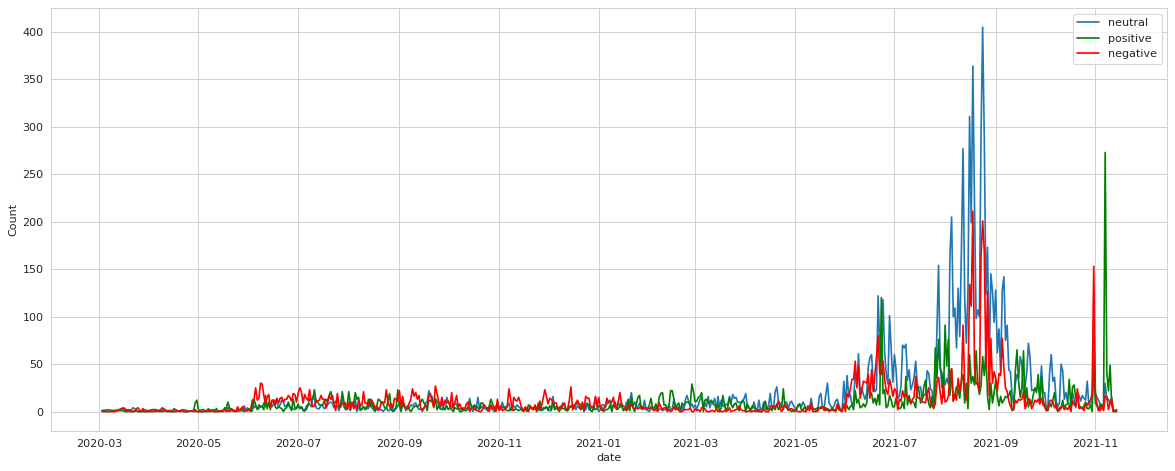

In [ ]:
plt.figure(figsize=(18,7), dpi=80)

sns.lineplot(data=new_comments, x='date', y='neutral', markers=True, label='neutral')
sns.lineplot(data=new_comments, x='date', y='positive', color='green', markers=True, label='positive')
sns.lineplot(data=new_comments, x='date', y='negative', color='red', markers=True, label='negative')

plt.ylabel('Count');

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=new_comments['date'], y=new_comments['neutral'],
                mode='lines+markers', marker_color='deepskyblue', name='Neutral'))
fig.add_trace(go.Scatter(x=new_comments['date'], y=new_comments['positive'], 
                mode='lines+markers', marker_color='seagreen', name='Positive'))
fig.add_trace(go.Scatter(x=new_comments['date'], y=new_comments['negative'], 
                mode='lines+markers', marker_color='orangered', name='Negative'))

fig.update_layout(title_text = 'Sentiment Neutral vs Positive vs Negative',
                  template='presentation',
                  plot_bgcolor='rgb(275, 270, 273)')

# Set x-axes and y-axes titles
fig.update_yaxes(title_text="Number of Sentiments")
fig.update_xaxes(title_text="Date")

fig.show()

> Using sliced corona data

## Sentiment Neutral vs Positive Active

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=coronas_slice['Tanggal'], y=coronas_slice['POSITIVE ACTIVE'],
                     name='Positive Active', 
                     marker_color='rgba(0, 0, 250, 0.3)',
                     marker_line_width=0),
              secondary_y=False)

fig.add_trace(go.Scatter(x=new_comments['date'], y=new_comments['neutral'],
                         mode='lines+markers', marker_color='deepskyblue', name='Sentiment Neutral'),
              secondary_y=True)


# Add figure title
fig.update_layout(
    title_text="COVID-19 Positive Active Cases vs Sentiment Neutral",
    template='presentation',
    plot_bgcolor='rgb(275, 270, 273)'
)

# Set x-axis title
# fig.update_xaxes(title_text="date")

# Set y-axes titles
fig.update_yaxes(title_text="Number of Sentiments", secondary_y=True, rangemode='tozero')
fig.update_yaxes(title_text="Number of Cases", secondary_y=False, rangemode='tozero')

fig.show()

## Sentiment Positive vs Positive Active

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=coronas_slice['Tanggal'], y=coronas_slice['POSITIVE ACTIVE'],
                     name='Positive Active', 
                     marker_color='rgba(0, 0, 250, 0.3)',
                     marker_line_width=0),
              secondary_y=False)

fig.add_trace(go.Scatter(x=new_comments['date'], y=new_comments['positive'],
                         mode='lines+markers', marker_color='seagreen', name='Sentiment Positive'),
              secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="COVID-19 Positive Active Cases vs Sentiment Positive",
    template='presentation',
    plot_bgcolor='rgb(275, 270, 273)'
)

# Set x-axis title
# fig.update_xaxes(title_text="date")

# Set y-axes titles
fig.update_yaxes(title_text="Number of Sentiments", secondary_y=True, rangemode='tozero')
fig.update_yaxes(title_text="Number of Cases", secondary_y=False, rangemode='tozero')

fig.show()

## Sentiment Negative vs Positive Active

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=coronas_slice['Tanggal'], y=coronas_slice['POSITIVE ACTIVE'],
                     name='Positive Active', 
                     marker_color='rgba(0, 0, 250, 0.3)',
                     marker_line_width=0),
              secondary_y=False)

fig.add_trace(go.Scatter(x=new_comments['date'], y=new_comments['negative'],
                         mode='lines+markers', marker_color='orangered', name='Sentiment Negative'),
              secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="COVID-19 Positive Active Cases vs Sentiment Negative",
    template='presentation',
    plot_bgcolor='rgb(275, 270, 273)'
)

# Set x-axis title
# fig.update_xaxes(title_text="date")

# Set y-axes titles
fig.update_yaxes(title_text="Number of Sentiments", secondary_y=True, rangemode='tozero')
fig.update_yaxes(title_text="Number of Cases", secondary_y=False, rangemode='tozero')

fig.show()

## ✅ Sentiment Neutral, Positive, Negative vs Positive Active

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=coronas_slice['Tanggal'], y=coronas_slice['POSITIVE ACTIVE'],
                     name='Positive Active', 
                     marker_color='rgba(0,0,250, 0.3)',
                     marker_line_width=0),
              secondary_y=False)

fig.add_trace(go.Scatter(x=new_comments['date'], y=new_comments['neutral'],
                         mode='lines+markers', marker_color='deepskyblue', name='Sentiment Neutral'),
              secondary_y=True)
fig.add_trace(go.Scatter(x=new_comments['date'], y=new_comments['positive'], 
                         mode='lines+markers', marker_color='seagreen', name='Sentiment Positive'),
              secondary_y=True)
fig.add_trace(go.Scatter(x=new_comments['date'], y=new_comments['negative'], 
                         mode='lines+markers', marker_color='orangered', name='Sentiment Negative'),
              secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="COVID-19 Positive Active Cases vs Sentiment (Neutral, Positive, Negative)",
    template='presentation',
    plot_bgcolor='rgb(275, 270, 273)'
)

# Set x-axis title
# fig.update_xaxes(title_text="date")

# Set y-axes titles
fig.update_yaxes(title_text="Number of Sentiments", secondary_y=True, rangemode='tozero')
fig.update_yaxes(title_text="Number of Cases", secondary_y=False, rangemode='tozero')

# margin legend
# fig.update_layout(margin=dict(r=25))
fig.show()

# Study Case Monthly

## Grouping COVID-19 Cases By Month

In [ ]:
# group by month
coronas_by_month = coronas.groupby(pd.Grouper(key='Tanggal', freq='M')).sum().reset_index()
coronas_by_month

,Tanggal,PROBABLE,SUSPECT,POSITIVE ACTIVE,CUMULATIVE RECOVERED,CUMULATIVE DEATH,NEW RECOVERED,NEW DEATH,NEW POSITIVE
0,2020-04-30,0,4363,2178,1056,476,94,30,218
1,2020-05-31,0,4798,2335,6479,1031,173,10,182
2,2020-06-30,0,7044,10498,13101,2722,541,127,1190
3,2020-07-31,0,10336,24479,53671,8979,2143,268,2406
4,2020-08-31,0,11020,16638,123210,16730,1814,184,1880
5,2020-09-30,2374,10806,15117,178398,21205,2138,169,2324
6,2020-10-31,2370,6535,14703,246956,26523,2086,140,2102
7,2020-11-30,1208,5406,16400,311605,31315,3314,264,3905
8,2020-12-31,1959,8607,24997,469446,43208,5708,460,6398
9,2021-01-31,2191,10430,28903,657140,59487,6091,495,6447


## ✅ COVID-19 Cases, Recovery, and Deaths Monthly

In [ ]:
temp = coronas_by_month.copy()
fig = go.Figure(data=[
                      go.Bar(name='Deaths', x=temp['Tanggal'], y=temp['NEW DEATH'], marker_color='#ff0000'),
                      go.Bar(name='Recovered Cases', x=temp['Tanggal'], y=temp['NEW RECOVERED'], marker_color='#2bad57'),
                      go.Bar(name='Confirmed Cases', x=temp['Tanggal'], y=temp['POSITIVE ACTIVE'], marker_color='#326ac7')])
fig.update_layout(barmode='stack')
fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text='COVID-19 Cases, Recovery and Deaths in Semarang Monthly',
                  plot_bgcolor='rgb(275, 270, 273)',
                  template='plotly_white')
fig.show()

## Grouping Data Train Comments By Monthly

In [ ]:
# sentiment by daily
new_comments.head()

,date,neutral,positive,negative
0,2020-03-03,1,1,0
1,2020-03-06,2,0,0
2,2020-03-11,1,1,0
3,2020-03-16,3,1,4
4,2020-03-17,0,0,3


In [ ]:
# group by month
comments_monthly = new_comments.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()
comments_monthly

,date,neutral,positive,negative
0,2020-03-31,26,7,22
1,2020-04-30,18,29,18
2,2020-05-31,30,49,30
3,2020-06-30,180,164,409
4,2020-07-31,189,300,369
5,2020-08-31,117,258,271
6,2020-09-30,218,180,344
7,2020-10-31,146,131,165
8,2020-11-30,120,94,219
9,2020-12-31,135,128,255


## ✅ Sentiment Neutral vs Positive vs Negative by Monthly

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=comments_monthly['date'], y=comments_monthly['neutral'],
                mode='lines+markers', marker_color='deepskyblue', name='Neutral'))
fig.add_trace(go.Scatter(x=comments_monthly['date'], y=comments_monthly['positive'], 
                mode='lines+markers', marker_color='seagreen', name='Positive'))
fig.add_trace(go.Scatter(x=comments_monthly['date'], y=comments_monthly['negative'], 
                mode='lines+markers', marker_color='orangered', name='Negative'))

fig.update_layout(title_text = 'Sentiment Neutral vs Positive vs Negative by Monthly',
                  template='presentation',
                  plot_bgcolor='rgb(275, 270, 273)')

# Set x-axes and y-axes titles
fig.update_yaxes(title_text="Number of Sentiments")
fig.update_xaxes(title_text="Date")

fig.show()

## ✅ Sentiment Neutral, Positive, Negative vs Positive Active by Monthly

> Slice data corona and adjust with the length of comments

In [ ]:
coronas_slice_by_month = coronas_slice.groupby(pd.Grouper(key='Tanggal', freq='M')).sum().reset_index()
coronas_slice_by_month

,Tanggal,PROBABLE,SUSPECT,POSITIVE ACTIVE,CUMULATIVE RECOVERED,CUMULATIVE DEATH,NEW RECOVERED,NEW DEATH,NEW POSITIVE
0,2020-04-30,0,4363,2178,1056,476,94,30,218
1,2020-05-31,0,4798,2335,6479,1031,173,10,182
2,2020-06-30,0,7044,10498,13101,2722,541,127,1190
3,2020-07-31,0,10336,24479,53671,8979,2143,268,2406
4,2020-08-31,0,11020,16638,123210,16730,1814,184,1880
5,2020-09-30,2374,10806,15117,178398,21205,2138,169,2324
6,2020-10-31,2370,6535,14703,246956,26523,2086,140,2102
7,2020-11-30,1208,5406,16400,311605,31315,3314,264,3905
8,2020-12-31,1959,8607,24997,469446,43208,5708,460,6398
9,2021-01-31,2191,10430,28903,657140,59487,6091,495,6447


In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=coronas_slice_by_month['Tanggal'], y=coronas_slice_by_month['POSITIVE ACTIVE'],
                     name='Positive Active', 
                     marker_color='rgba(0,0,200, 0.3)',
                     marker_line_width=0),
              secondary_y=False)

fig.add_trace(go.Scatter(x=comments_monthly['date'], y=comments_monthly['neutral'],
                         mode='lines+markers', marker_color='deepskyblue', name='Sentiment Neutral'),
              secondary_y=True)
fig.add_trace(go.Scatter(x=comments_monthly['date'], y=comments_monthly['positive'], 
                         mode='lines+markers', marker_color='seagreen', name='Sentiment Positive'),
              secondary_y=True)
fig.add_trace(go.Scatter(x=comments_monthly['date'], y=comments_monthly['negative'], 
                         mode='lines+markers', marker_color='orangered', name='Sentiment Negative'),
              secondary_y=True)

# Add figure title
fig.update_layout(
    title_text="COVID-19 Positive Active Cases vs Sentiment (Neutral, Positive, Negative)",
    template='presentation',
    plot_bgcolor='rgb(275, 270, 273)'
)

# Set x-axis title
# fig.update_xaxes(title_text="date")

# Set y-axes titles
fig.update_yaxes(title_text="Number of Sentiments", secondary_y=True, rangemode='tozero')
fig.update_yaxes(title_text="Number of Cases", secondary_y=False, rangemode='tozero')

# margin legend
# fig.update_layout(margin=dict(r=25))
fig.show()

# Study Case Weekly

## Grouping COVID-19 Cases By Weekly

In [ ]:
# group by weekly
coronas_weekly = coronas.groupby(pd.Grouper(key='Tanggal', freq='W')).sum().reset_index()
coronas_weekly

,Tanggal,PROBABLE,SUSPECT,POSITIVE ACTIVE,CUMULATIVE RECOVERED,CUMULATIVE DEATH,NEW RECOVERED,NEW DEATH,NEW POSITIVE
0,2020-04-12,0,476,173,84,51,27,14,69
1,2020-04-19,0,1172,598,268,122,14,7,91
2,2020-04-26,0,1619,925,357,183,29,9,52
3,2020-05-03,0,1947,804,674,210,43,0,14
4,2020-05-10,0,1853,551,1167,210,75,0,38
...,...,...,...,...,...,...,...,...,...
80,2021-10-24,11,102,93,571421,45412,33,1,37
81,2021-10-31,2,85,132,571713,45425,47,5,71
82,2021-11-07,6,86,129,490451,38962,79,1,58
83,2021-11-14,5,97,58,572562,45452,37,-1,37


## COVID-19 Cases, Recovery, and Deaths Weekly

In [ ]:
temp = coronas_weekly.copy()
fig = go.Figure(data=[
                      go.Bar(name='Deaths', x=temp['Tanggal'], y=temp['NEW DEATH'], marker_color='#ff0000'),
                      go.Bar(name='Recovered Cases', x=temp['Tanggal'], y=temp['NEW RECOVERED'], marker_color='#2bad57'),
                      go.Bar(name='Confirmed Cases', x=temp['Tanggal'], y=temp['POSITIVE ACTIVE'], marker_color='#326ac7')])
fig.update_layout(barmode='stack')
fig.update_traces(textposition='inside')
# fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text='COVID-19 Cases, Recovery and Deaths in Semarang Weekly',
                  plot_bgcolor='rgb(275, 270, 273)',
                  template='presentation')
fig.show()

# ✅ Wordcloud
- Monthly
- Filter timeframe